In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import sklearn
from scipy import stats
import numpy as np

# DrugBank

In [7]:
# Correlation for Drugbank results (xgboost probability - docking energy)
db_activity = pd.read_csv("~/Open_Malaria_2/Open_Malaria_2/Listas_FPs/energias_FP_DB.csv",  index_col=None, decimal=".", sep=",", na_values="ND")

In [8]:
db_activity

,Unnamed: 0,ACTIVITY_PROBABILITY,DB_ID,MM_GBSA
0,0,0.9318245649,DB08899,-38.3894
1,1,0.9156965017,DB07903,-37.3708
2,2,0.9130964279,DB06953,-55.5908
3,3,0.9098517895,DB02101,-23.3255
4,4,0.9054901004,DB01260,-41.6662
5,5,0.8845117688,DB01587,-39.2805
6,6,0.8798914552,DB07884,-37.4918
7,7,0.8741381168,DB03445,-32.3401
8,8,0.8635569811,DB02872,-42.0974
9,9,0.8574893475,DB04330,-46.5971


In [13]:
# First try: Sperman correlation
spcor_db, pval_db = stats.spearmanr(db_activity.loc[:,'ACTIVITY_PROBABILITY'], db_activity.loc[:,'MM_GBSA'])

In [14]:
spcor_db

0.64661654135338342

In [15]:
pval

0.002063821154359418

In [19]:
# Second try: drawing boxplots

db_activity.ix[0:9,'ranking'] = 'top'
db_activity.ix[10:19, 'ranking'] = 'bottom'

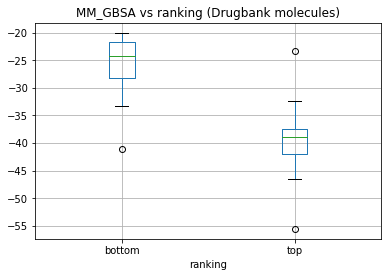

In [27]:
fig = db_activity.boxplot('MM_GBSA', by='ranking')
fig.get_figure().suptitle("")
plt.title("MM_GBSA vs ranking (Drugbank molecules)")
plt.show()

In [32]:
# Checking if equal variance

var_db_top = np.var(pd.DataFrame(db_activity.ix[0:9,'MM_GBSA']).values)
print("Var top:", var_db_top)

Var top: 64.3375854984


In [33]:
var_db_bottom = np.var(pd.DataFrame(db_activity.ix[10:19,'MM_GBSA']).values)
print("Var bottom:", var_db_bottom)

Var bottom: 38.8990986304


In [54]:
# Wilcoxon test
t_db, tprob_db = stats.ttest_ind(db_activity.ix[0:9,'MM_GBSA'], db_activity.ix[10:19,'MM_GBSA'], axis=0)

In [55]:
t_db

-3.8730460031794647

In [56]:
tprob_db

0.0011143833737701284

# Marine molecules set 1

In [38]:
# Correlation for the first list of marine molecules 
mm1_activity = pd.read_csv("~/Open_Malaria_2/Open_Malaria_2/Listas_FPs/energias_FP_mm1.csv",  index_col=None, decimal=".", sep=",", na_values="ND")

In [39]:
mm1_activity

,Unnamed: 0,ACTIVITY_PROBABILITY,ID,MM_GBSA
0,0,0.127604,Palmerolide-A,-57.8797
1,1,0.126537,Dendrinolide,-44.8962
2,2,0.071786,Membranolide,NaN
3,3,0.048513,Hodgsonal,-18.6712
4,4,0.043330,Suberitenone-A,-65.4205
5,22,0.001966,Caminatal.smi,-38.0834
6,23,0.001867,Fucostanol.smi,-65.1968
7,24,0.001507,Psammopemmin-A.smi,-36.2777
8,25,0.000945,"3,5-dibromo-4-hydroxybenzaldehyde.smi",-23.7325
9,26,0.000132,Austrodoral.smi,-23.8462


In [46]:
# removing 2nd row (NaN value)
mm1_activity = mm1_activity.drop(2)

In [47]:
#Spearman corr
spcor_mm1, pval_mm1 = stats.spearmanr(mm1_activity.loc[:,'ACTIVITY_PROBABILITY'], mm1_activity.loc[:,'MM_GBSA'])

In [48]:
spcor_mm1

-0.38333333333333336

In [49]:
pval_mm1

0.30849527238037144

In [50]:
# Second try: drawing boxplots

mm1_activity.ix[0:4,'ranking'] = 'top'
mm1_activity.ix[5:9, 'ranking'] = 'bottom'

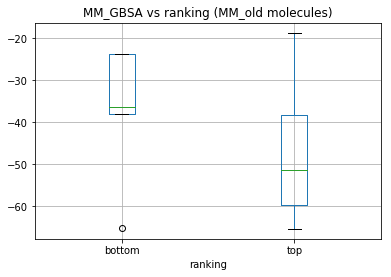

In [51]:
fig = mm1_activity.boxplot('MM_GBSA', by='ranking')
fig.get_figure().suptitle("")
plt.title("MM_GBSA vs ranking (MM_old molecules)")
plt.show()

In [59]:
# Wilcoxon test
t_mm1, tprob_mm1 = stats.ttest_ind(mm1_activity.ix[0:4,'MM_GBSA'], mm1_activity.ix[5:9,'MM_GBSA'], axis=0)

In [60]:
t_mm1

-0.74645290992016888

In [61]:
tprob_mm1

0.47970758915835499

# Marine molecules set 2

In [52]:
# Correlation for the second list of marine molecules (proven to have activity against malaria - but we don't know to which target)
mm2_activity = pd.read_csv("~/Open_Malaria_2/Open_Malaria_2/Listas_FPs/energias_FP_mm2.csv",  index_col=None, decimal=".", sep=",", na_values="ND")

In [53]:
mm2_activity

,Unnamed: 0,ACTIVITY_PROBABILITY,ID,MM_GBSA
0,0,0.008469,coralloidolide-b,-33.3147
1,1,0.003559,coralloidolide-e,-31.3611
2,2,0.002693,austrodoris-1a,-49.8293
3,3,0.002128,paesslerin-a,-18.3213
4,4,0.001237,austrodoris-3a,-47.2660
5,7,0.000330,lignarenone-b,-32.4840
6,8,0.000319,austrodoris-5,-45.8440
7,9,0.000219,austrodoris-2,-48.3543
8,10,0.000145,austrodoris-3b,-42.6038
9,11,0.000134,austrodoris-4,-67.5120


In [62]:
#Spearman corr
spcor_mm2, pval_mm2 = stats.spearmanr(mm2_activity.loc[:,'ACTIVITY_PROBABILITY'], mm2_activity.loc[:,'MM_GBSA'])

In [63]:
spcor_mm2

0.49090909090909085

In [64]:
pval_mm2

0.14965567342083677

In [66]:
# Second try: drawing boxplots

mm2_activity.ix[0:4,'ranking'] = 'top'
mm2_activity.ix[5:9, 'ranking'] = 'bottom'

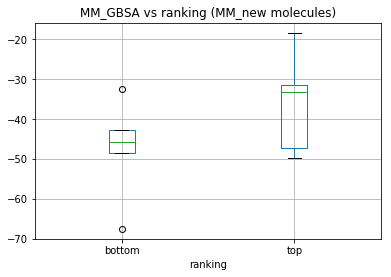

In [67]:
fig = mm2_activity.boxplot('MM_GBSA', by='ranking')
fig.get_figure().suptitle("")
plt.title("MM_GBSA vs ranking (MM_new molecules)")
plt.show()

In [68]:
# Wilcoxon test
t_mm2, tprob_mm2 = stats.ttest_ind(mm2_activity.ix[0:4,'MM_GBSA'], mm2_activity.ix[5:9,'MM_GBSA'], axis=0)

In [69]:
t_mm2

1.399850572181274

In [70]:
tprob_mm2

0.19912248818044301